In [1]:
import numpy as np
from LinearClassification import TwoClassesClassification
from BasisFunction import BaseBasicFunction
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def __classify(x, t):
    if t < 0.5:
        return False
    return True

def _classify(X, t):
    X1 = []
    X0 = []
    for i in range(len(t)):
        if __classify(X[i], t[i]):
            X1.append(X[i])
        else:
            X0.append(X[i])
    return (np.array(X0), np.array(X1))

In [2]:
Nsample = 200
sampleNoise = 0.1

Training MSE = [[0.00010413]]
[[  7.73176347]
 [ -0.54761563]
 [ -7.57128311]
 [ -2.53836659]
 [-17.19361348]
 [  0.52861099]
 [ -7.69769164]
 [  0.52073187]
 [  2.98958873]
 [ -5.14097919]
 [ -0.92313035]
 [ -1.1062248 ]
 [ -2.37657108]
 [  4.57637956]
 [ -3.01019692]]


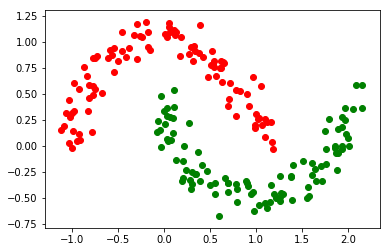

In [3]:
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)
plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r')
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g')

X, t = _shuffle(X, t)
funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
    lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
    lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
    lambda x: np.power(x[:, 0], 4),
    lambda x: np.power(x[:, 1], 4),
]

Xfeatures = BaseBasicFunction(X, funcs).generate()
classifier = TwoClassesClassification(Xfeatures, t, Nepoch = 1000, eta = 0.05).fit()
print(classifier.w)

In [6]:
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 100)
halfSample = int(Nsample/2)

Xfeatures = BaseBasicFunction(X, funcs).generate()

prediction = classifier.predict(Xfeatures, t.reshape(-1, 1))

MSE for prediction = [[0.00622286]]


(47476, 2)
(42524, 2)


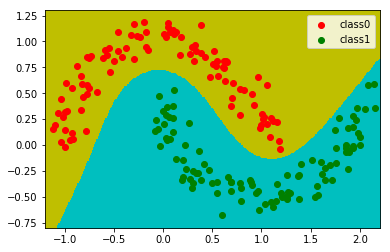

In [7]:
xlim = (-1.2, 2.2)
ylim = (-0.8, 1.3)
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xyFeatures = BaseBasicFunction(xygrid, funcs).generate()
prediction = classifier.predict(xyFeatures)

X0, X1 = _classify(xygrid, prediction)

print(X0.shape)
print(X1.shape)
plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)

plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r', label = "class0")
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g', label = "class1")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()